### Principal Component Analysis

PCA, invented by Karl Pearson in 1901. Given a dataset with dimensions (where each dimension could be the measurement of a single gene, or cytokine, or SNP), we can project all observations into a set of  k new dimensions, which end up being linear combinations of the original dimensions. Though some information is "lost" in this reduction, PCA preserves the maximal variation in those new dimensions.

PCA is useful for reducing the size of data, particularly data with many features, while retaining the ability to model. This is a highly intelligible way, though watered down, of saying ‘PCA uses singular value decomposition to find orthogonal, recombined principle components from the original features which can explain most of the variance in the original data with remarkably less memory’. 

**Steps Involved:**
- Standardize the data. (with mean =0 and variance = 1)

- Compute the Covariance matrix of dimensions.

- Obtain the Eigenvectors and Eigenvalues from the covariance matrix (we can also use correlation matrix or even Single value decomposition, however in this post will focus on covariance matrix).

- Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k largest eigenvalues (k will become the number of dimensions of the new feature subspace k≤d, d is the number of original dimensions).

- Construct the projection matrix W from the selected k Eigenvectors.

- Transform the original data set X via W to obtain the new k-dimensional feature subspace Y. 

Let’s import some of the required libraries and also the Iris data set.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import seaborn as sns

df = pd.read_csv( filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',') 

### Data Preprocessing

Before applying PCA, we should preprocess the data.
- Load the dataset in a pandas dataframe.
- Check for null values, datatypes, and explore the columns for unique values.
- Visualize the dataset, 
- Normalize the data, so that PCA isn't affected by the scale.

In [53]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'] 

In [54]:
print(df.isnull().values.any())

False


In [55]:
df.dropna(how="all", inplace=True)

In [56]:
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [57]:
df['class'].nunique()

3

C:\Users\simra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\simra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\simra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\simra\App

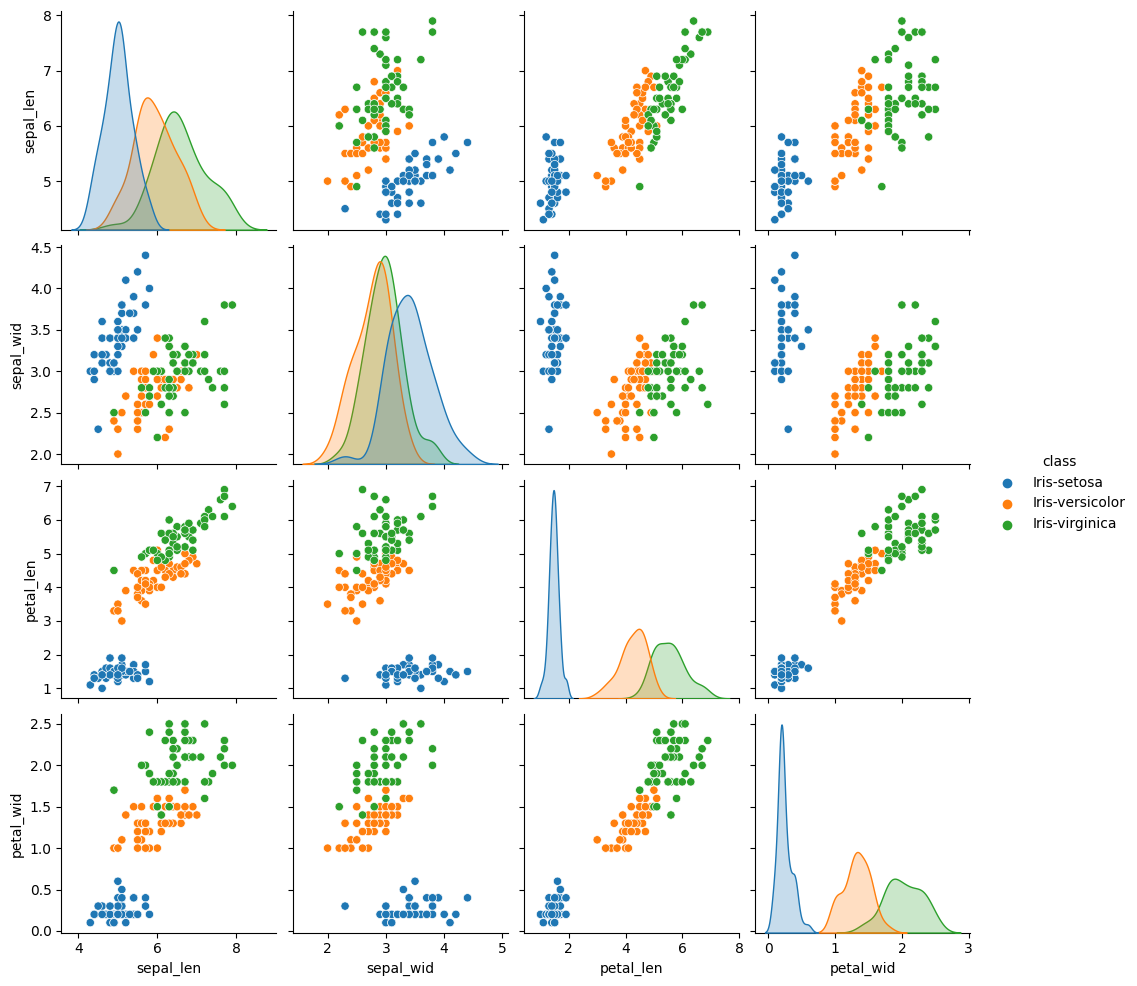

In [19]:
df = sns.pairplot(df, hue='class')

In [58]:
X = df.iloc[:,0:4].values 
y = df.iloc[:,4].values

### PCA

In [59]:
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(X)

C:\Users\simra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


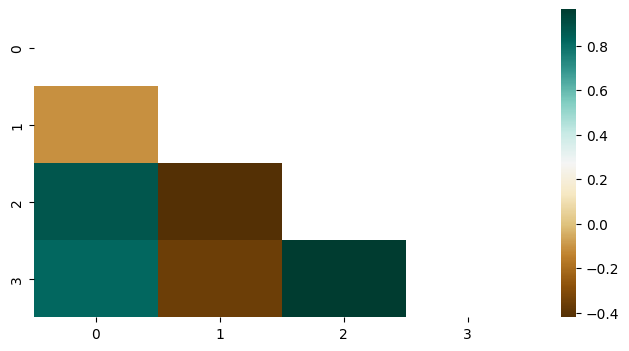

In [60]:
X_std_df = pd.DataFrame(X_std)

# Calculate the correlation matrix
corr_matrix = X_std_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with a valid color palette and annotations
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap='BrBG', annot=True, mask=mask, fmt=".2f")
plt.show()

In [62]:
X_std_df.corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


In [63]:
mean_vec = np.mean(X_std, axis=0) 
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) 
print('Covariance matrix \n%s' %cov_mat) 

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [64]:
cov_mat = np.cov(X_std.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [65]:
sq_eig=[] 
for i in eig_vecs:
    sq_eig.append(i**2) 
    print(sq_eig) 

[array([0.27287211, 0.13862096, 0.51986524, 0.06864169])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01]), array([0.31991586, 0.00427922, 0.40170422, 0.2741007 ])]


In [66]:
print("sum of squares of each values in an eigen vector is \n", 0.27287211+ 0.13862096+0.51986524+ 0.06864169) 
for ev in eig_vecs: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

sum of squares of each values in an eigen vector is 
 1.0


In [67]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
for i in range(len(eig_vals))]
print(type(eig_pairs))

#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.sort(reverse=True)
print("\n",eig_pairs) 
#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

<class 'list'>

 [(2.930353775589318, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.9274036215173425, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163978, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.02074601399559601, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]



Eigenvalues in descending order:
2.930353775589318
0.9274036215173425
0.14834222648163978
0.02074601399559601


In [68]:
tot = sum(eig_vals) 
print("\n",tot) 
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))


 4.026845637583896


1. Variance Explained
 [72.77045209380134, 23.030523267680653, 3.683831957627385, 0.5151926808906337]


2. Cumulative Variance Explained
 [ 72.77045209  95.80097536  99.48480732 100.        ]


3. Percentage of variance the first two principal components each contain
  [72.77045209380134, 23.030523267680653]


4. Percentage of variance the first two principal components together contain
 95.80097536148199


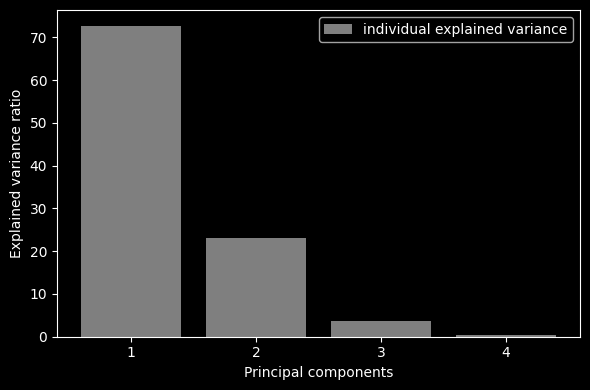

In [69]:
tot = sum(eig_vals)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
            label='individual explained variance', color='white')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks(range(len(var_exp)), range(1, len(var_exp) + 1)) 
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [70]:
print(eig_pairs[0][1]) 
print(eig_pairs[1][1]) 
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))) 
print('Matrix W:\n', matrix_w)

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]
Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [71]:
Y = X_std.dot(matrix_w) 
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


In [79]:
projected_data = X_std.dot(matrix_w)
reconstructed_data = projected_data.dot(matrix_w.T)
reconstruction_error = np.mean(np.square(X_std - reconstructed_data)) * 100

print("Reconstruction Error: {:.2f}%".format(reconstruction_error))

Reconstruction Error: 4.20%


In [77]:
projected_data = X_std.dot(matrix_w)

# Calculate the projection error for each data point
projection_errors = np.linalg.norm(X_std - projected_data.dot(matrix_w.T), axis=1)

# Calculate the average projection error
average_projection_error = np.mean(projection_errors) * 100

print("Average Projection Error: {:.2f}%".format(average_projection_error))

Average Projection Error: 34.32%


In [73]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


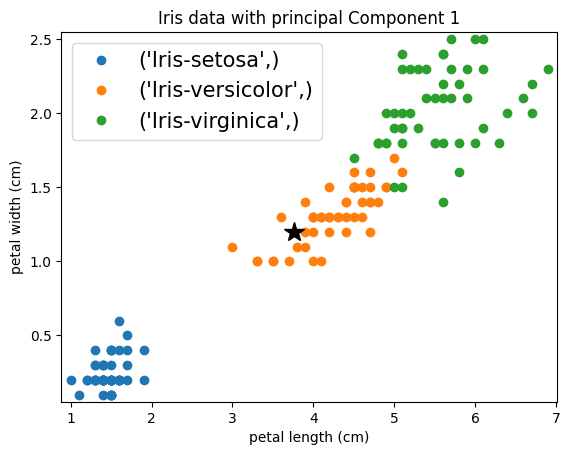

In [49]:
# Plot Petal length vs petal width only
m = np.array([df['petal_len'].mean(), df['petal_wid'].mean()])

for key, group in df.groupby(['class']):
    plt.plot(group['petal_len'], group['petal_wid'], label=key, marker='o', linestyle='none')

# Add the mean value to the plot
plt.plot(m[0], m[1], marker='*', color='black', markersize=15)

# Tidy up plot
plt.legend(loc=0, fontsize=15)
plt.margins(0.02)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris data with principal Component 1')
plt.show()


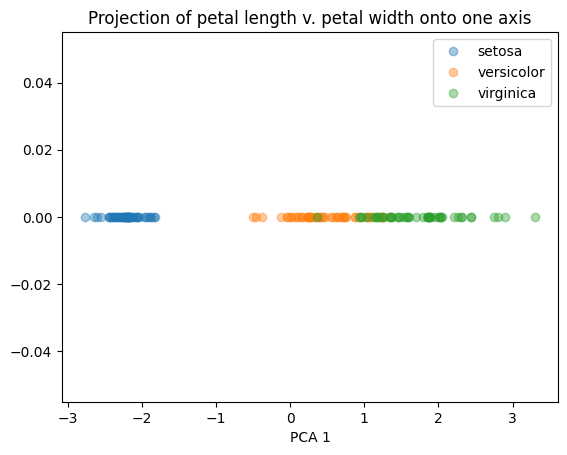

In [47]:
principal_component_1 = finalDf['principal component 1']
for key, group in finalDf.groupby('species'):
    plt.plot(group['principal component 1'], np.zeros_like(group['principal component 1']), 
             label=key, marker='o', linestyle='none', alpha=0.4)
plt.margins(0.05)
plt.xlabel('PCA 1')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.title('Projection of petal length v. petal width onto one axis')
plt.show()
